# Python para análise exemplificando setor de Varejo


### Objetivo da Análise
O conjunto de dados utilizado nesta análise exploratória é um conjunto fictício que simula vendas no varejo.
O principal objetivo desta análise é treinar e aplicar técnicas de Análise Exploratória de Dados utilizando a linguagem Python. Através desta análise, busco compreender melhor as características do nosso conjunto de dados, identificar padrões, tendências e possíveis anomalias.

### Lista de Perguntas:
1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria Escritório ?
2. Qual o Total de Vendas Por Data do Pedido ?
3. Qual o Total de Vendas por Estado ?
4. Quais São as 10 Cidades com Maior Total de Vendas ?
5. Qual Segmento Teve o Maior Total de Vendas ?
6. Qual o Total de Vendas Por Segmento e Por Ano ?
7. Quantas Vendas Receberiam 15% de Desconto ?
8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto ?
9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês ?
10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias ? 

## Carregando os Dados

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


dados = pd.read_csv('dados/dataset.csv', sep=',')

In [180]:
dados.sample(5) # Amostra dos dados

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Desconto,Valor_Venda_Desconto,Mes_Pedido
8579,CA-2015-130673,2015-05-20,MC-17590,Corporate,Brasil,Água Branca,Piauí,TEC-AC-10004227,Aparelhos,Acessórios,20.784,2015,0.1,18.7056,5
4924,CA-2018-143245,2018-12-01,AD-10180,Home Office,Brasil,Imaculada,Paraíba,OFF-PA-10001972,Papelaria,Papel,19.440,2018,0.1,17.4960,12
813,CA-2018-143686,2018-05-14,PJ-19015,Consumidor,Brasil,Alvinópolis,Minas Gerais,FUR-FU-10000794,Decoração,Mobiliário,18.280,2018,0.1,16.4520,5
3233,US-2018-156356,2018-04-16,ND-18370,Consumidor,Brasil,Itueta,Minas Gerais,OFF-ST-10002301,Papelaria,Armazenamento,32.544,2018,0.1,29.2896,4
302,CA-2017-142545,2017-10-28,JD-15895,Corporate,Brasil,Brasilândia,Mato Grosso do Sul,OFF-BI-10002706,Papelaria,Pastas,14.280,2017,0.1,12.8520,10


In [181]:
# Verificando o tipo de dado de cada coluna
dados.dtypes

ID_Pedido                object
Data_Pedido              object
ID_Cliente               object
Segmento                 object
Pais                     object
Cidade                   object
Estado                   object
ID_Produto               object
Categoria                object
SubCategoria             object
Valor_Venda             float64
Ano_Pedido                int64
Desconto                float64
Valor_Venda_Desconto    float64
Mes_Pedido                int64
dtype: object

In [182]:
# Verificando se há registros duplicados
print(dados[dados.duplicated()])

# Verificando de há valores ausentes
dados.isnull().sum()

Empty DataFrame
Columns: [ID_Pedido, Data_Pedido, ID_Cliente, Segmento, Pais, Cidade, Estado, ID_Produto, Categoria, SubCategoria, Valor_Venda, Ano_Pedido, Desconto, Valor_Venda_Desconto, Mes_Pedido]
Index: []


ID_Pedido               0
Data_Pedido             0
ID_Cliente              0
Segmento                0
Pais                    0
Cidade                  0
Estado                  0
ID_Produto              0
Categoria               0
SubCategoria            0
Valor_Venda             0
Ano_Pedido              0
Desconto                0
Valor_Venda_Desconto    0
Mes_Pedido              0
dtype: int64

In [183]:
# Resumo estatístico vendas
print(dados['Valor_Venda'].describe())

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64


## 1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria Escritório?

In [184]:
cidades_suplies = dados[dados['Categoria'] == 'Papelaria']
cidades_suplies = cidades_suplies.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending = False)
cidades_suplies.head(1)

Cidade
Arraias    9895.036
Name: Valor_Venda, dtype: float64

## 2. Qual o Total de Vendas Por Data do Pedido?

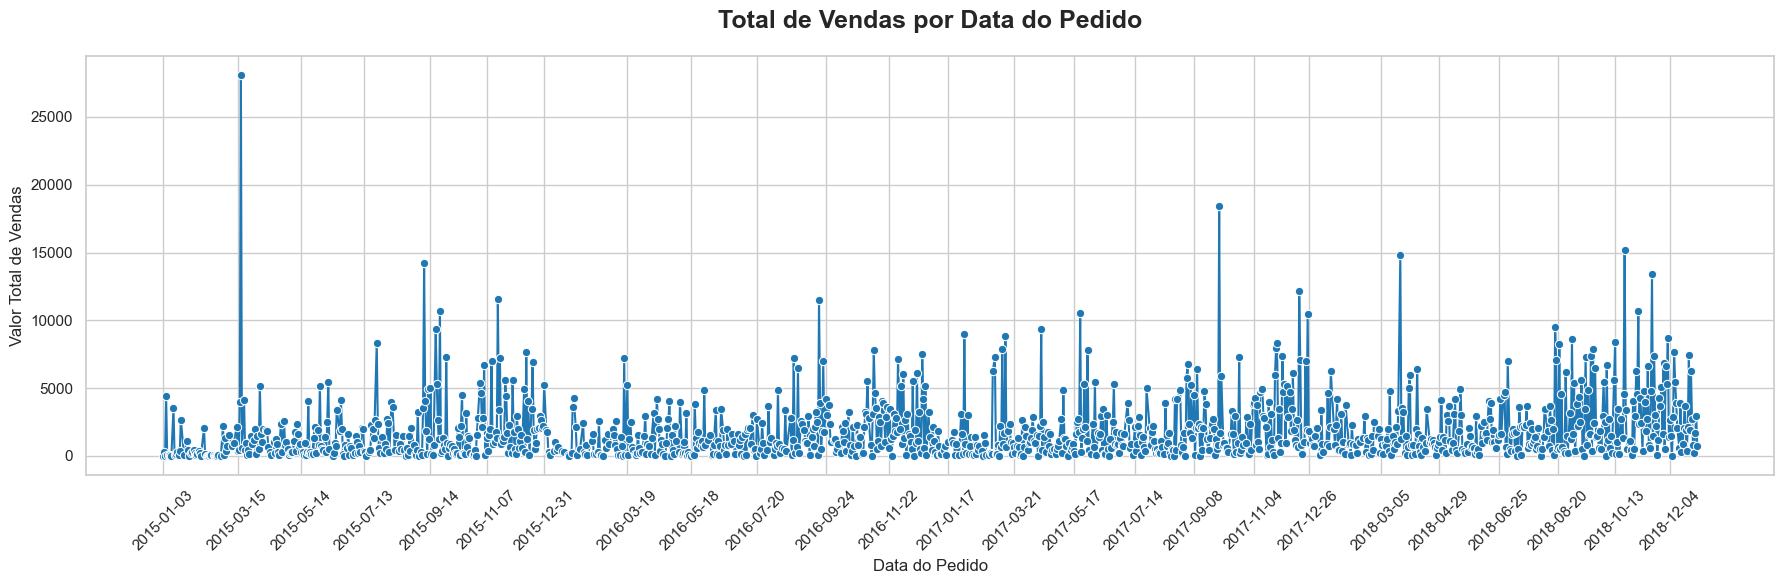

In [185]:
# Configuração estética do seaborn
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Garantir que a coluna de datas esteja no formato datetime
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'])

# Agrupando e somando o total de vendas por data
total_vendas_por_data = dados.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

# Ordenar por data em ordem crescente
total_vendas_por_data = total_vendas_por_data.sort_values('Data_Pedido')

# Gráfico de linha
plt.figure(figsize=(18,6))
sns.lineplot(data=total_vendas_por_data, x='Data_Pedido', y='Valor_Venda', marker='o')

plt.title('Total de Vendas por Data do Pedido', fontsize=18, fontweight="bold", pad=20)
plt.xlabel('Data do Pedido', fontsize=12)
plt.ylabel('Valor Total de Vendas', fontsize=12)

# Mostrar apenas algumas datas no eixo x
plt.xticks(total_vendas_por_data['Data_Pedido'][::50], rotation=45)
plt.tight_layout()
plt.show()


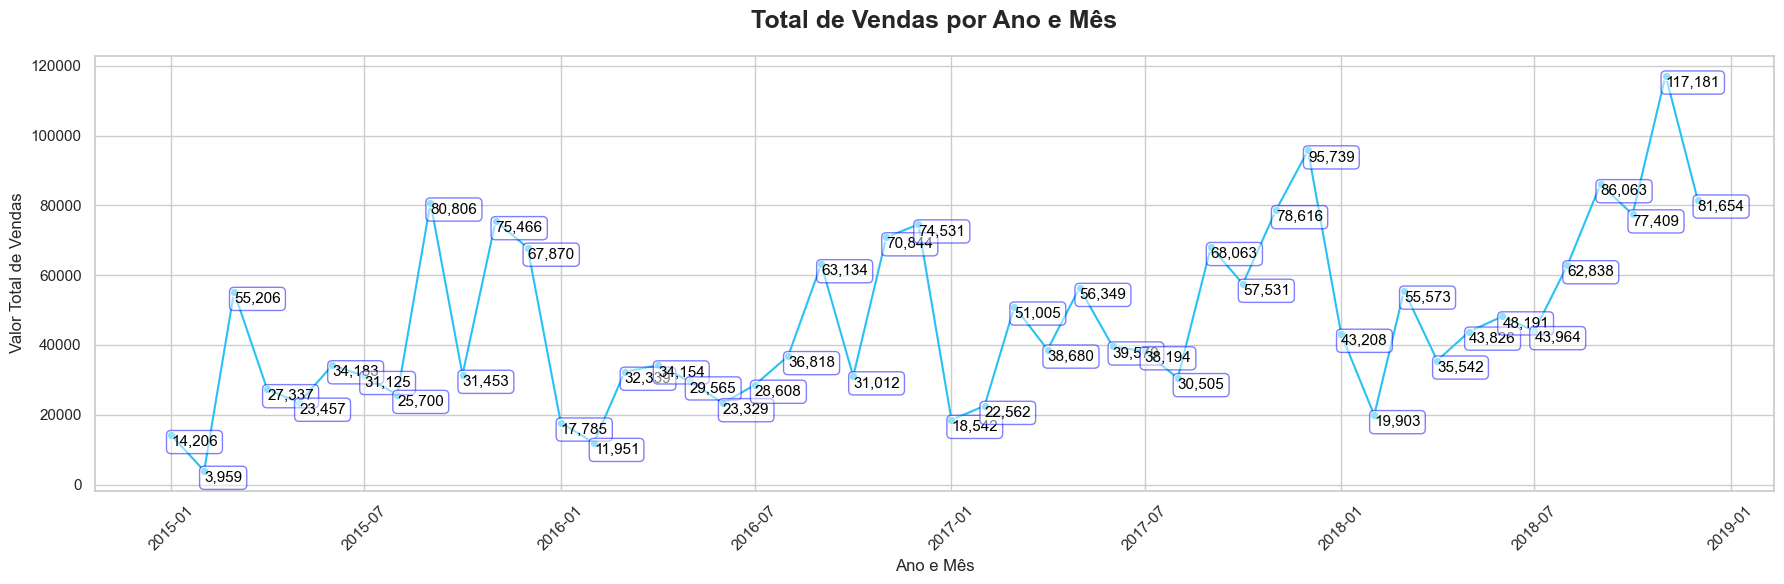

In [186]:
# Convertendo para datetime corretamente
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], dayfirst=True)

# Criando coluna AnoMes
dados['AnoMes'] = dados['Data_Pedido'].dt.to_period('M')

# Agrupando por Ano e Mês
vendas_por_ano_mes = dados.groupby('AnoMes')['Valor_Venda'].sum().reset_index()
vendas_por_ano_mes['AnoMes'] = vendas_por_ano_mes['AnoMes'].dt.to_timestamp()

# Ordenar por data em ordem crescente
vendas_por_ano_mes = vendas_por_ano_mes.sort_values('AnoMes')

# Gráfico
plt.figure(figsize=(18,6))
sns.lineplot(data=vendas_por_ano_mes, x='AnoMes', y='Valor_Venda', marker='o', color='#27C2F5')

# Adicionar labels em cada ponto com fundo
for x, y in zip(vendas_por_ano_mes['AnoMes'], vendas_por_ano_mes['Valor_Venda']):
    plt.text(
        x, y, f'{y:,.0f}', 
        ha='left', va='top', fontsize=11, color='black',
        bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3', alpha=0.5)
    )

plt.title('Total de Vendas por Ano e Mês', fontsize=18, fontweight="bold", pad=20)
plt.xlabel('Ano e Mês', fontsize=12)
plt.ylabel('Valor Total de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Qual o Total de Vendas por Estado?

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_5788\522049863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


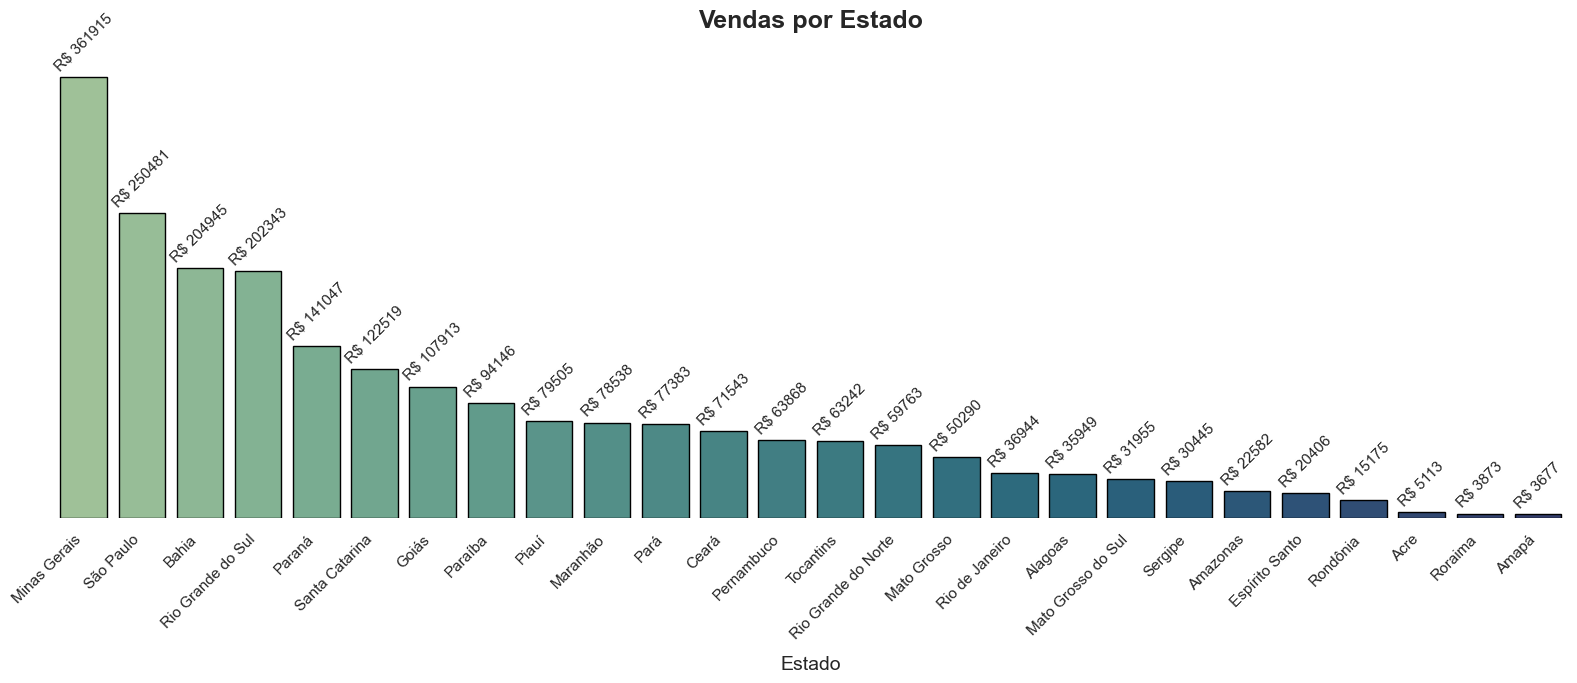

In [187]:
# Agrupamento dos dados
vendas_por_estado = dados.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Estilo
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 7))

# Gráfico de barras
ax = sns.barplot(
    data=vendas_por_estado.sort_values("Valor_Venda", ascending=False),
    x="Estado",
    y="Valor_Venda",
    palette="crest",   # pode trocar: "viridis", "crest", "flare", "rocket"
    edgecolor="black"
)

# Título
ax.set_title("Vendas por Estado", fontsize=18, fontweight="bold", pad=20)

# Rótulo eixo X
ax.set_xlabel("Estado", fontsize=14, labelpad=10)

# Remove eixo Y e rótulo
ax.get_yaxis().set_visible(False)

# Rotação labels eixo X
plt.xticks(rotation=45, ha="right")

# Labels em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt="R$ %.0f", fontsize=11, label_type="edge", padding=3, rotation=45)

# Remove grades e bordas extras
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## 4. Quais São as 10 Cidades com Maior Total de Vendas?

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_5788\2891058434.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


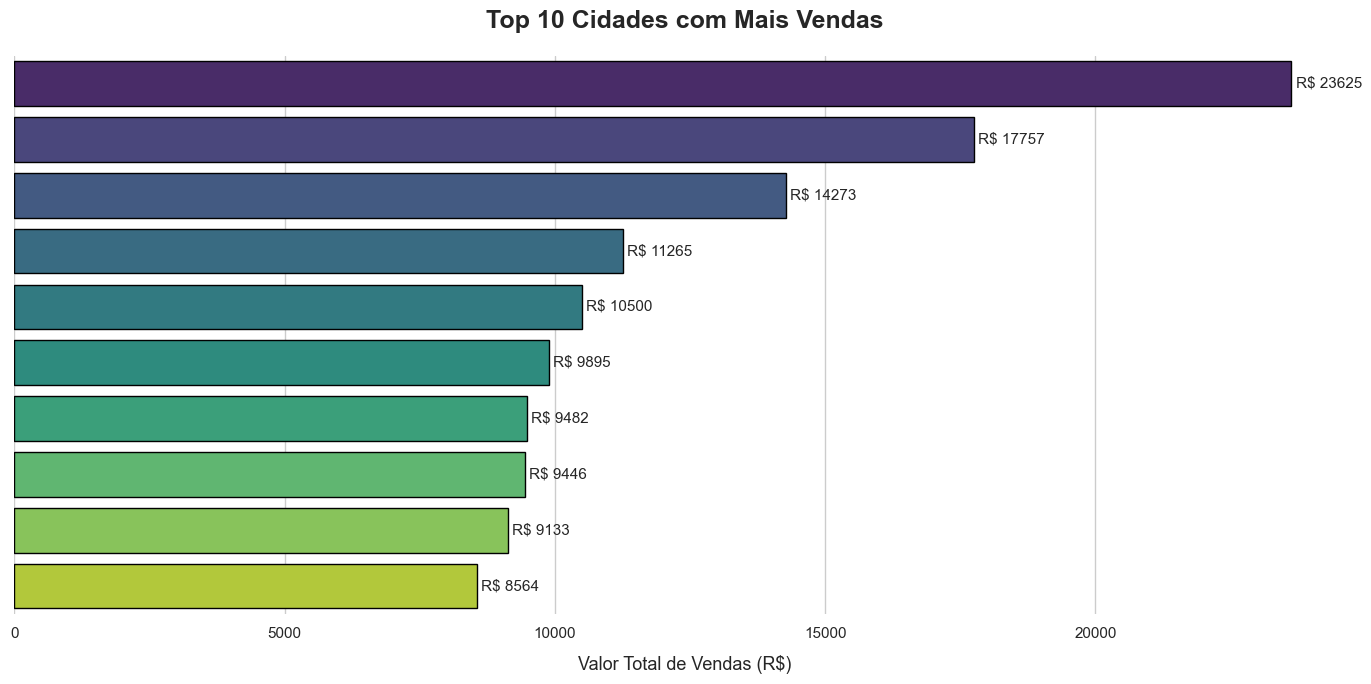

In [188]:
# Agrupamento e seleção do top 10
top10_cidades_vendas = (
    dados.groupby('Cidade')['Valor_Venda']
    .sum()
    .reset_index()
    .sort_values('Valor_Venda', ascending=False)
    .head(10)
)

# Estilo moderno
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

# Gráfico horizontal (melhor para nomes longos de cidades)
ax = sns.barplot(
    data=top10_cidades_vendas,
    y="Cidade",
    x="Valor_Venda",
    palette="viridis",   # opções: "mako", "viridis", "flare", "rocket"
    edgecolor="black"
)
# Remove eixo Y e rótulo
ax.get_yaxis().set_visible(False)

# Título
ax.set_title("Top 10 Cidades com Mais Vendas", fontsize=18, fontweight="bold", pad=20)

# Remove eixo Y de valores (ficam só os rótulos nas barras)
ax.set_xlabel("Valor Total de Vendas (R$)", fontsize=13, labelpad=10)


# Adicionar labels dentro das barras
for container in ax.containers:
    ax.bar_label(container, fmt="R$ %.0f", fontsize=11, padding=3)

# Deixar mais clean
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


## 5. Qual Segmento Teve o Maior Total de Vendas?

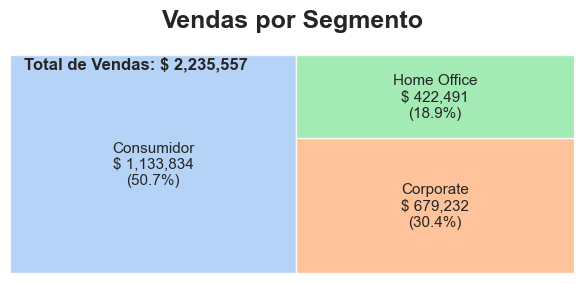

In [189]:
import squarify  # pip install squarify

# Agrupando
segmentos_vendas = (
    dados.groupby('Segmento')['Valor_Venda']
    .sum()
    .reset_index()
    .sort_values('Valor_Venda', ascending=False)
)

# Total
total = int(segmentos_vendas["Valor_Venda"].sum())

# Paleta de cores
cores = sns.color_palette("pastel", len(segmentos_vendas))

# Criando Treemap
fig, ax = plt.subplots(figsize=(6, 3))
squarify.plot(
    sizes=segmentos_vendas["Valor_Venda"],
    label=[
        f"{seg}\n$ {val:,.0f}\n({val/total:.1%})"
        for seg, val in zip(segmentos_vendas["Segmento"], segmentos_vendas["Valor_Venda"])
    ],
    color=cores,
    alpha=0.8,
    text_kwargs={'fontsize': 11, 'weight': 'light'}
)

# Estilos extras
ax.set_title("Vendas por Segmento", fontsize=18, fontweight="bold", pad=20)
plt.axis("off")

# Texto com total
plt.annotate(
    f"Total de Vendas: $ {total:,}",
    xy=(0, 1), xycoords="axes fraction",
    xytext=(10, -10), textcoords="offset points",
    fontsize=12, fontweight="bold", ha="left"
)

plt.tight_layout()
plt.show()


## 6. Qual o Total de Vendas Por Segmento e Por Ano ?

In [190]:
# Coluna apenas para informar o ano do pedido
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], dayfirst=True)
dados['Ano_Pedido'] = dados['Data_Pedido'].dt.year

# Agrupar considerando somente o ano e o segmento
vendas_ano_segmento = dados.groupby(['Ano_Pedido', 'Segmento'])['Valor_Venda'].sum()

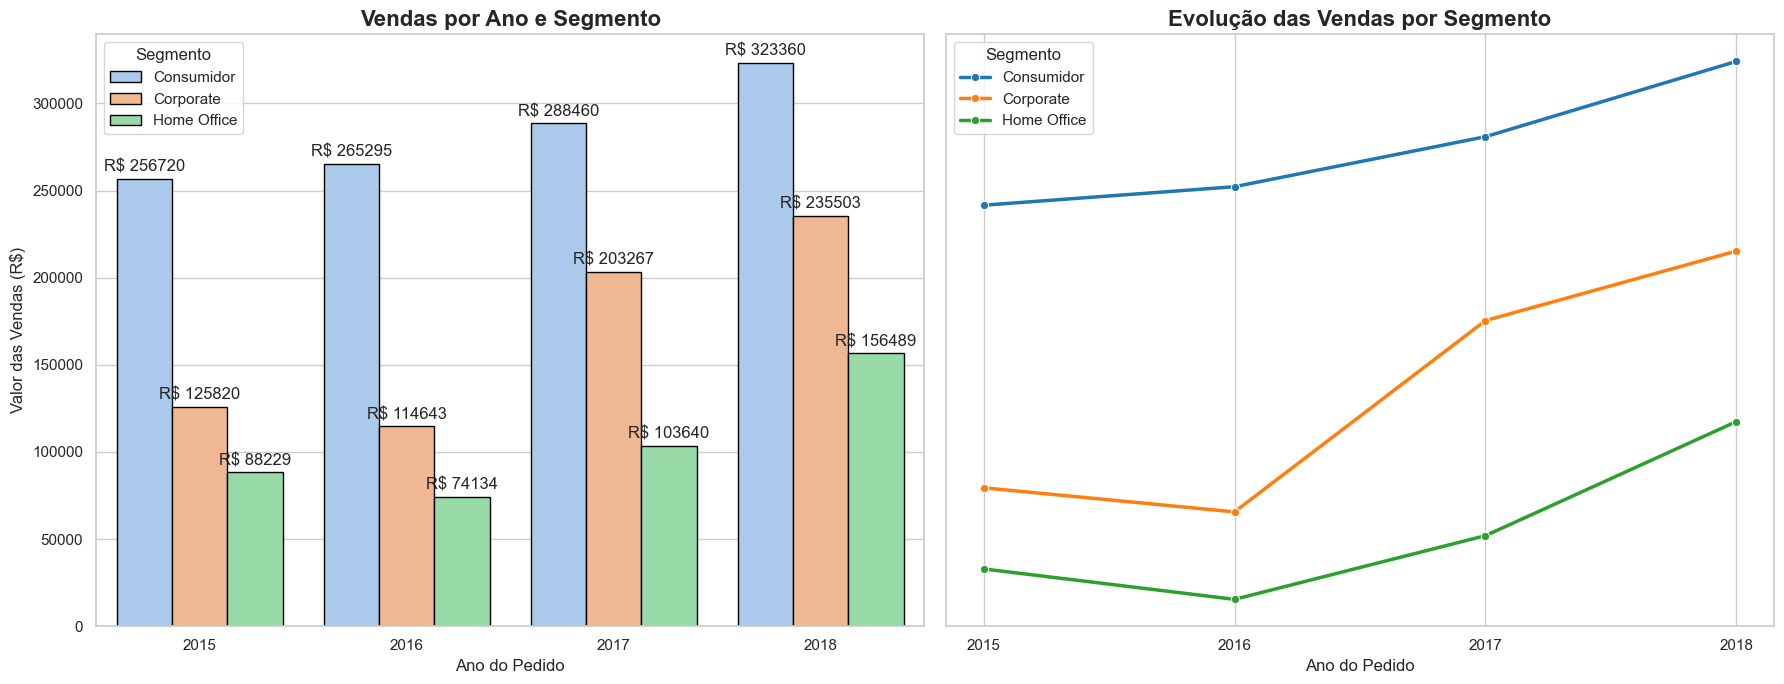

In [191]:
# Transformando o groupby em DataFrame
vendas_ano_segmento_df = vendas_ano_segmento.reset_index()
# Garantir que os anos sejam inteiros
vendas_ano_segmento_df["Ano_Pedido"] = vendas_ano_segmento_df["Ano_Pedido"].astype(int)

# Configuração visual
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 linha, 2 colunas

# -----------------------------
# Gráfico de barras agrupadas
# -----------------------------
ax1 = axes[0]
sns.barplot(
    data=vendas_ano_segmento_df,
    x="Ano_Pedido",
    y="Valor_Venda",
    hue="Segmento",
    palette="pastel",
    edgecolor="black",
    ax=ax1
)

ax1.set_title("Vendas por Ano e Segmento", fontsize=16, fontweight="bold")
ax1.set_xlabel("Ano do Pedido")
ax1.set_ylabel("Valor das Vendas (R$)")   # remove eixo vertical
ax1.legend(title="Segmento")

# Adicionando valores em cima de cada barra
for container in ax1.containers:
    ax1.bar_label(container, fmt="R$ %.0f", padding=3, rotation=0)

# -----------------------------
# Gráfico de linhas
# -----------------------------
ax2 = axes[1]
sns.lineplot(
    data=vendas_ano_segmento_df,
    x=vendas_ano_segmento_df["Ano_Pedido"].astype(str),  # CONVERTE PARA STRING
    y="Valor_Venda",
    hue="Segmento",
    marker="o",
    palette="tab10",
    linewidth=2.5,
    ax=ax2
)

ax2.set_title("Evolução das Vendas por Segmento", fontsize=16, fontweight="bold")
ax2.set_xlabel("Ano do Pedido")
ax2.set_ylabel("")
ax2.get_yaxis().set_visible(False)
ax2.legend(title="Segmento")


plt.tight_layout()
plt.show()

## 7. Quantas Vendas Receberiam 15% de Desconto ?

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.



In [192]:
# Unsando numpy where (condition, value if true, value if false)
dados['Desconto'] = np.where(dados['Valor_Venda'] > 100, 0.15, 0.10)

# Contar quantas vendas têm cada desconto e transformar em DataFrame
vendas_com_desconto = dados['Desconto'].value_counts().reset_index()
vendas_com_desconto.columns = ['Desconto', 'Quantidade de Vendas']
vendas_com_desconto

,Desconto,Quantidade de Vendas
0,0.10,6049
1,0.15,3651


## 8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto ?

In [193]:
# Valor de venda menos o desconto
dados['Valor_Venda_Desconto'] = dados['Valor_Venda'] - (dados['Valor_Venda'] * dados['Desconto'])
# Vendas antes do desconto
media_vendas_antes_desconto = dados[dados['Desconto'] == 0.15]['Valor_Venda']
media_vendas_depois_desconto = dados[dados['Desconto'] == 0.15]['Valor_Venda_Desconto']
# Agora apenas retornamos os valores médios
print('Média das vendas ANTES do desconto de 15%:  R$',round(media_vendas_antes_desconto.mean(),2))
print('Média das vendas DEPOIS do desconto de 15%: R$',round(media_vendas_depois_desconto.mean(),2))

Média das vendas ANTES do desconto de 15%:  R$ 560.27
Média das vendas DEPOIS do desconto de 15%: R$ 476.23


## 9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês ?

In [194]:
# Obtemos o mês para cada pedido
dados['Mes_Pedido'] = dados['Data_Pedido'].dt.month

# Agrupando por ano, mês e segmento
stats_ano_mes_segmento = dados.groupby(['Ano_Pedido', 'Mes_Pedido', 'Segmento'])['Valor_Venda']
stats_ano_mes_segmento = stats_ano_mes_segmento.agg(['sum', 'mean', 'median'])

<Figure size 1400x700 with 0 Axes>

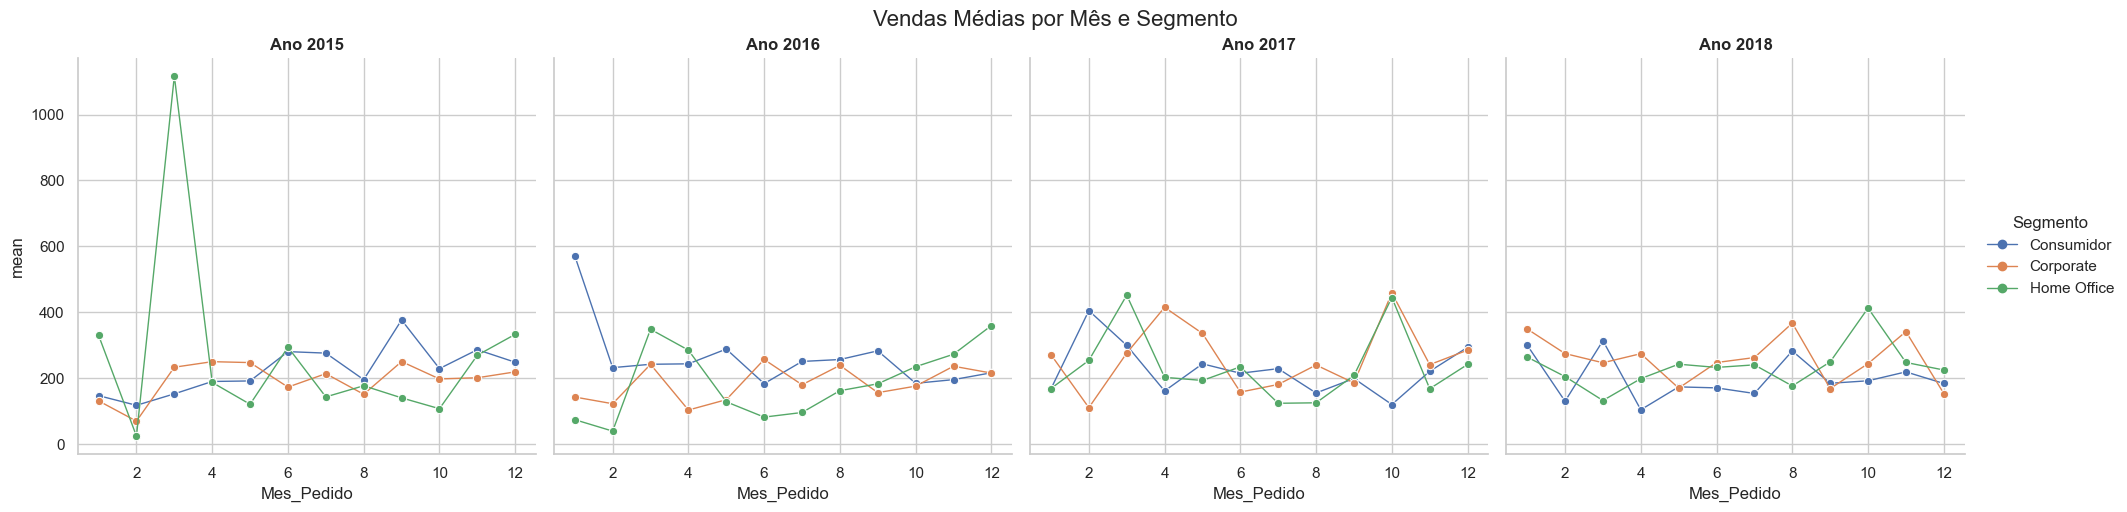

In [195]:
# Obtendo as partições
anos = stats_ano_mes_segmento.index.get_level_values(0)
meses = stats_ano_mes_segmento.index.get_level_values(1)
segmentos = stats_ano_mes_segmento.index.get_level_values(2)

# Gráficos
plt.figure(figsize=(14, 7))
fig1 = sns.relplot(
    kind='line', data=stats_ano_mes_segmento, 
    y='mean', x=meses,
    hue=segmentos, col=anos, col_wrap=4,
    marker='o', linewidth=1)

fig1.set_titles("Ano {col_name}", fontsize=14, fontweight="bold")
fig1.figure.suptitle('Vendas Médias por Mês e Segmento', fontsize=16, y=1.02)

plt.show()

## 10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias ? 

In [196]:
# Agrupamento por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
categorias = dados.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True)
categorias = categorias.sort_values('Valor_Venda', ascending = False).head(12)
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
categorias = categorias[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

# Criamos outro dataframe somente com os totais por categoria
categorias_cat = categorias.groupby('Categoria').sum(numeric_only = True).reset_index()

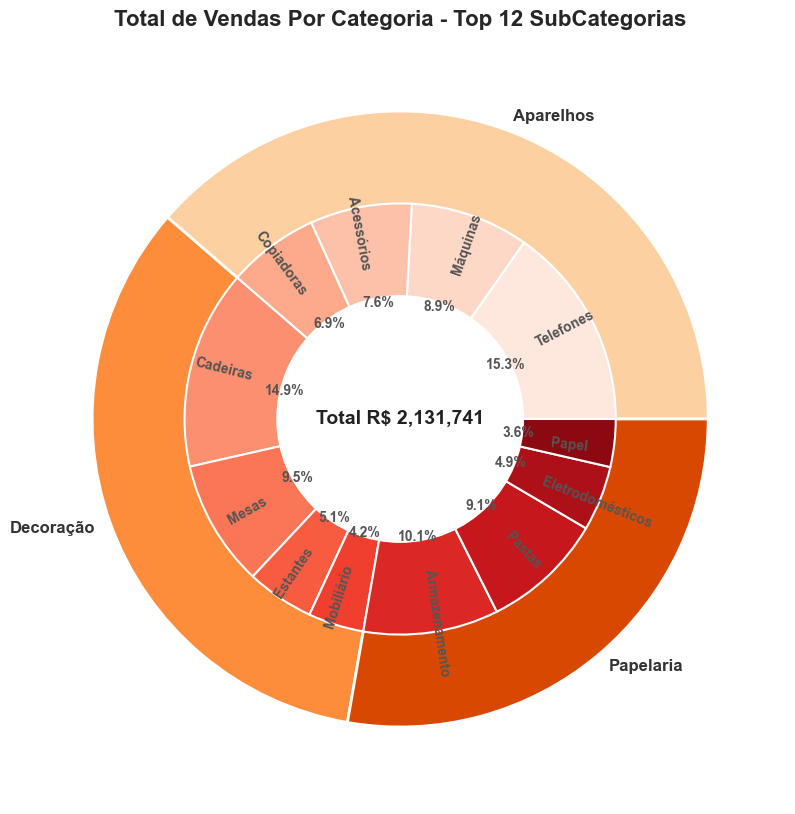

In [ ]:
# Paleta de cores quentes
cores_categorias = sns.color_palette("Oranges", n_colors=len(categorias_cat))
cores_subcategorias = sns.color_palette("Reds", n_colors=len(categorias))

# Tamanho da figura
fig, ax = plt.subplots(figsize=(16, 10))

# Gráfico das categorias (camada externa)
ax.pie(
    categorias_cat['Valor_Venda'], 
    radius=1,
    labels=categorias_cat['Categoria'],
    labeldistance=1.05,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    colors=cores_categorias,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#333333'}
)

# Gráfico das subcategorias (camada interna)
ax.pie(
    categorias['Valor_Venda'],
    radius=0.7,
    labels=categorias['SubCategoria'],
    autopct=lambda pct: f'{pct:.1f}%',
    colors=cores_subcategorias,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    pctdistance=0.55,
    labeldistance=0.7,
    rotatelabels=True,
    textprops={'fontsize': 10, 'weight': 'bold', 'color': '#555555'}
)

# Limpa o centro do círculo (donut)
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
ax.add_artist(centre_circle)

# Anotação do total de vendas no centro
total_vendas = categorias['Valor_Venda'].sum()
ax.annotate(f'Total R$ {int(total_vendas):,}', xy=(0, 0), ha='center', va='center',
            fontsize=14, fontweight='bold', color='#222222')

# Título
plt.title('Total de Vendas Por Categoria - Top 12 SubCategorias', fontsize=16, fontweight='bold')

# Fundo limpo
fig.patch.set_facecolor('white')
plt.show()